

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> the dataset is No-show appointments dataset. the dataset contains 100K record of patient and need to tell why some of the patient didn't show up to their appointments.



### Question(s) for Analysis


>1. what is the number of patient that had appointment and the who actually attended?
>2. what is the average duration between the schedualed day and appointment?
>3. which the most disease category who go to the medical center?
>4. which gender is effected the most of the diseases? 
>5. may the people who didnt attend the appointment because they didnt have sms alert?

<a id='wrangling'></a>
## Data Wrangling



### General Properties
> before start to answering the above questions we have first to clear and wrangle the data in order to have data that is formated and ready to be analyzed. first lets import the libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [147]:
# read the dataset
df=pd.read_csv("KaggleV2-May-2016.csv")

In [148]:
# print the head of the dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:
#print the shape of the data
df.shape

(110527, 14)

In [150]:
# print all the info about the dataset number of null values, data types and so on..! 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [151]:
# show the data statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [152]:
# lets get the precintage of people that dont show
didnt_show = pd.DataFrame(df['No-show'].value_counts())
didnt_show = didnt_show.T
didnt_show['total'] = didnt_show['No'] + didnt_show['Yes']
didnt_show['perc_no'] = (didnt_show['Yes'] / didnt_show['total']) * 100
didnt_show

,No,Yes,total,perc_no
No-show,88208,22319,110527,20.193256



### Data Cleaning
> 1. create new column that holds diffrent between appointmnet day and schedualed day i will call it diffrence 
> 2. ppointmentday string > date
> 3. no-show string > int(0, 1)
> 4. SchedualedDay string > date
> 5. convert all the column names to start with lower case letter
> 6. Gender string > int(0, 1) 

In [153]:
# convert appointment day and schedualed day to date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [154]:
# lets have unified time zone for ScheduledDay and AppointmentDay so we can get diffrence between them
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda d: d.replace(tzinfo=None))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda v: v.replace(tzinfo=None))

In [155]:
# create new column diffrence
df['diffrence'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [156]:
# lets check all the numbers of the diffrence are valid 
df.diffrence.value_counts().sort_index().head()

-6        1
-1        4
 0    38563
 1     5213
 2     6725
Name: diffrence, dtype: int64

In [157]:
# here i will drop all numbers that are less than zero because we cant have negative diffrence between schedualed day and appointment day
df.drop(df[df['diffrence'] < 0].index, inplace = True)

In [158]:
# here i will change the no-show from string to binary 
df['No-show'] = df['No-show'].map({'No':0, 'Yes':1})

In [159]:
# here lets convert all the column names to be with lower case
df.columns = df.columns.str.lower()
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 
              'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show','diffrence']

In [160]:
# here lets remove the age that are less than 0
df.drop(df[df['age'] < 0].index, inplace = True)

In [161]:
# lets see how the data changed
df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diffrence
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110521 non-null float64
appointment_id     110521 non-null int64
gender             110521 non-null object
scheduled_day      110521 non-null datetime64[ns]
appointment_day    110521 non-null datetime64[ns]
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hipertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handcap            110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null int64
diffrence          110521 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), object(2)
memory usage: 13.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (the number of patient that had appointment and the who actually attended)

In [163]:
schedule = df['appointment_day']
df_1 = df.query("no_show==0")['appointment_day']

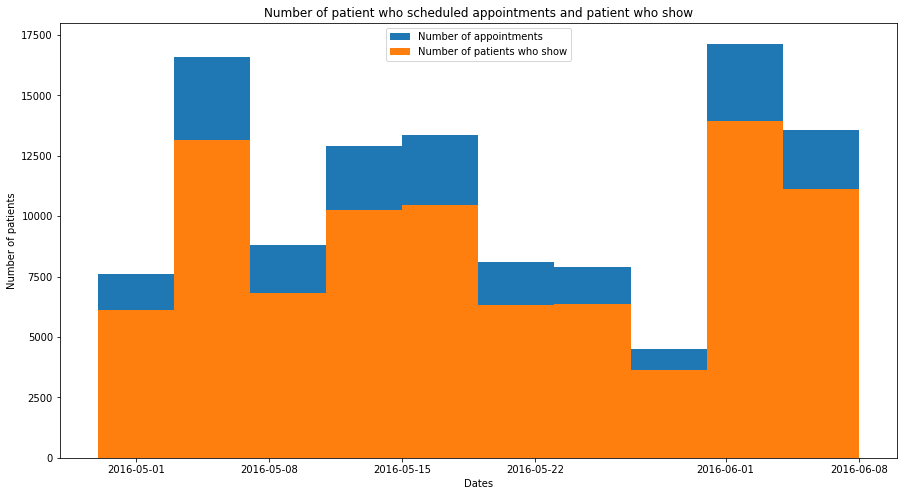

In [164]:
plt.figure(figsize=(15,8))
plt.hist(schedule, label='Number of appointments')
plt.hist(df_1, label='Number of patients who show')
plt.title('Number of patient who scheduled appointments and patient who show')
plt.xlabel('Dates')
plt.ylabel('Number of patients')
plt.legend();

### Research Question 2  (what is the average duration between the schedualed day and appointment?)
> it shows the long time between the appointment day and schedualed day the more people dont show

In [165]:
diff = df['diffrence']
diff1 = df.query("no_show==1")['diffrence']

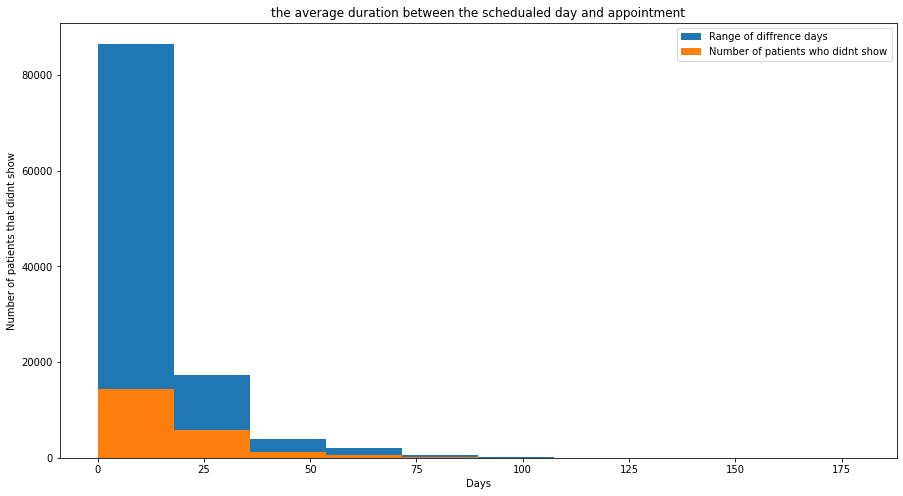

In [166]:
plt.figure(figsize=(15,8))
plt.hist(diff, label='Range of diffrence days')
plt.hist(diff1, label='Number of patients who didnt show')
plt.title('the average duration between the schedualed day and appointment')
plt.xlabel('Days')
plt.ylabel('Number of patients that didnt show')
plt.legend();

## Research Question 3 (which the most disease category who go to the medical center? )
> this can help to know which product can be available in medical center and which type of doctors have to be available most of the time

In [167]:
hip = df['hipertension'].sum()
dia = df['diabetes'].sum()
alcohol = df['alcoholism'].sum()
hc = df['handcap'].sum()

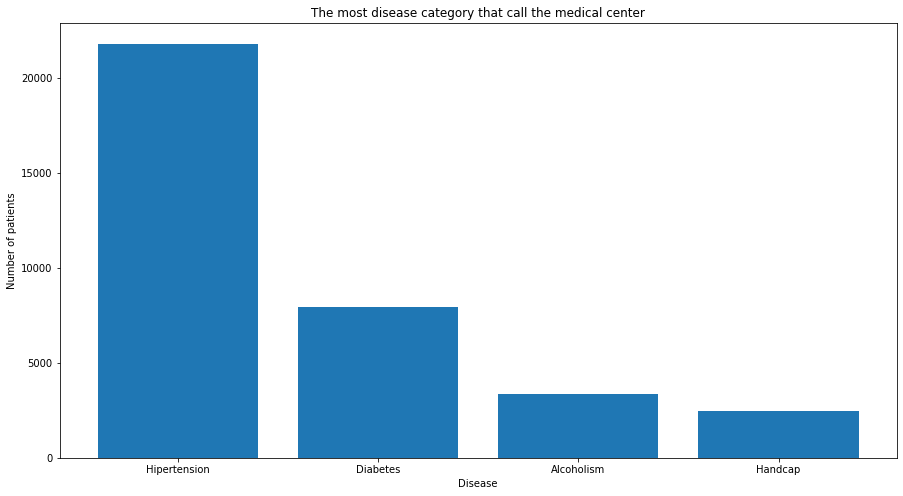

In [168]:
plt.figure(figsize=(15,8))
plt.bar([1, 2, 3, 4], [hip, dia, alcohol, hc], tick_label=['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'])
plt.title('The most disease category that call the medical center')
plt.xlabel('Disease')
plt.ylabel('Number of patients');


## Research Question 4 (which gender is effected the most of the diseases? )
> this can help to tell which gender will more likely to attend the appointment

In [170]:
diseases = ['hipertension', 'diabetes', 'alcoholism', 'handcap']
gender_effect = df.groupby('gender')[diseases].mean()*100

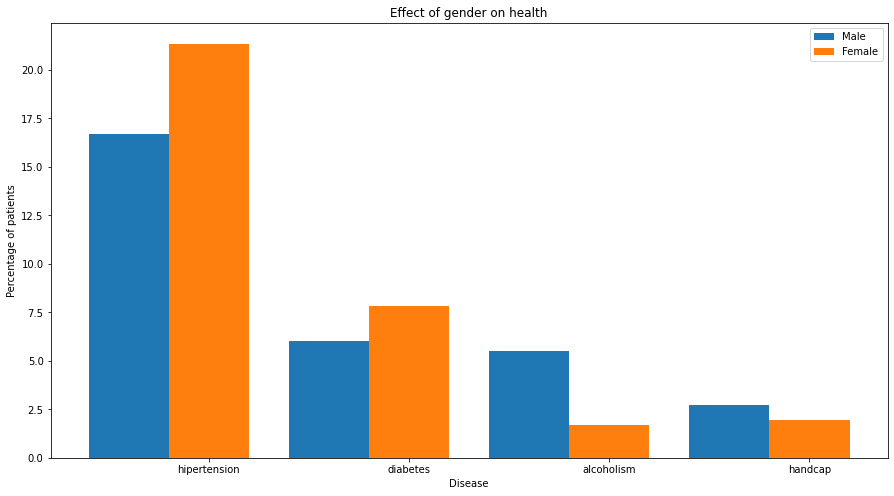

In [172]:
plt.figure(figsize=(15, 8))
plt.bar(np.arange(4), gender_effect.loc['M'], 0.4, label='Male', tick_label=gender_effect.columns)
plt.bar(np.arange(4)+0.4, gender_effect.loc['F'], 0.4, label='Female',  tick_label=gender_effect.columns)
plt.title('Effect of gender on health')
plt.xlabel('Disease')
plt.ylabel('Percentage of patients')
plt.legend();


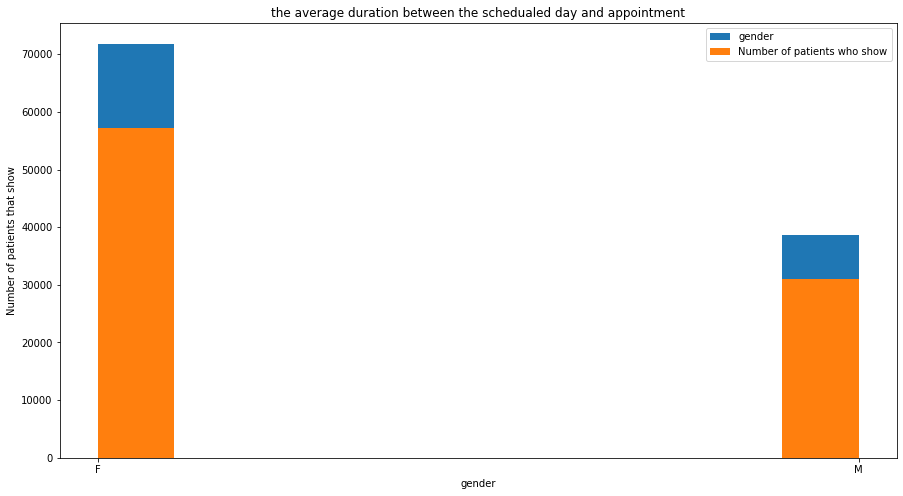

In [189]:
gen=df['gender']
show = df.query("no_show==0")['gender']
plt.figure(figsize=(15,8))
plt.hist(gen, label='gender')
plt.hist(show, label='Number of patients who show')
plt.title('the average duration between the schedualed day and appointment')
plt.xlabel('gender')
plt.ylabel('Number of patients that show')
plt.legend();

## Research Question 5 (may the people who didnt attend the appointment because they didnt have sms alert?) 
> this can help us to tell if it is reason for patient didnt attend the appointment 

In [186]:
sms = df['sms_received']
noshow = df.query("no_show==1")['sms_received']

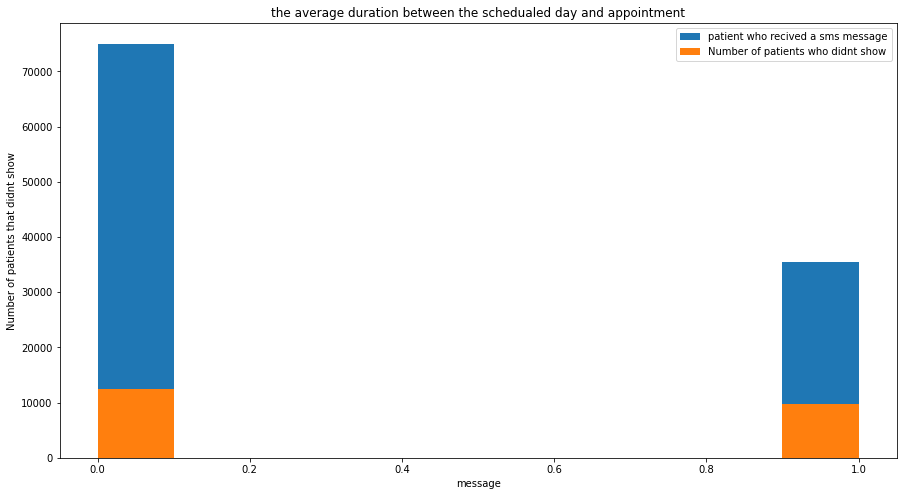

In [190]:
plt.figure(figsize=(15,8))
plt.hist(sms, label='patient who recived a sms message')
plt.hist(noshow, label='Number of patients who didnt show')
plt.title('the average duration between the schedualed day and appointment')
plt.xlabel('message')
plt.ylabel('Number of patients that didnt show')
plt.legend();


<a id='conclusions'></a>
## Conclusions

> the answears for the above questions are:
> Q1: shows that the most of the patient attend to the medical center on the weekends and less in sunday. such the data shows each sunday the number of appointmend decreasing and increase at the end of the week. also, it shows that the patient that mostly attend their appointments are more in sunday than the weekends
> Q2: shows the long the duration between the appointment and the scheduled day is reason for patient to not show up 
> Q3: the most common diseases in sequence are Hipertension, Diabetes, Alcoholism and Handcap
> Q4: shows the most gender effected with Hipertension and Diabetes are Female than male and thats why the most who appointments made for female and also shows the most gender that dont attend also female.
> Q5: the most of the people who didnt show in the appointments those who didnt recive message and thats because the most of the people forgets about the appointment specially if the duration between the appointment and schedual day is large

> some more questions can be asked is:
>1. does the patient did not show related to the hospital location?
>2. does the patient suffer from alcoholism?
>3. does the people who  doesnt have a scholarship are the one who always not show?
>4. how many times the patient apply for appointment?

### Limitations
> 1. the time period that was recorded for this data is very short
> 2. the schedual was not recorder for all the dates
> 3. if the prices of the appointments were added it will be more accurate 




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])